<a href="https://colab.research.google.com/github/poojithav123/ML-Models/blob/main/health_isurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/insurance.csv')

Get Information on data


In [ ]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,index,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.sample(5)

,index,age,sex,bmi,children,smoker,region,charges
1265,1265,64,male,23.76,0,yes,southeast,26926.5144
1073,1073,54,female,28.88,2,no,northeast,12096.6512
730,730,35,male,24.42,3,yes,southeast,19361.9988
510,510,56,male,32.11,1,no,northeast,11763.0009
965,965,35,male,27.10,1,no,southwest,4746.3440


In [ ]:
data.shape
print("No. of rows: ",data.shape[0])
print("No. of columns: ",data.shape[1])

No. of rows:  1338
No. of columns:  8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
data.isnull().sum()

,0
index,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Get Overall Statistics of the dataset

In [ ]:
data.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


Converting Data from String to numerical values


In [ ]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data["smoker"]=data["smoker"].map({'yes':1, 'no':0})


In [ ]:
data['region']=data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [ ]:
data['sex']=data['sex'].map({'female':0, 'male':1})

In [ ]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,1,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,3,21984.47061
4,4,32,1,28.880,0,0,3,3866.85520


Store Feature Matrix in X and Response(Targt) in Vector y

In [ ]:
data.drop('index',axis=1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [ ]:
data.drop('children',axis=1)

,index,age,sex,bmi,smoker,region,charges
0,0,19,0,27.900,1,1,16884.92400
1,1,18,1,33.770,0,2,1725.55230
2,2,28,1,33.000,0,2,4449.46200
3,3,33,1,22.705,0,3,21984.47061
4,4,32,1,28.880,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,0,3,10600.54830
1334,1334,18,0,31.920,0,4,2205.98080
1335,1335,18,0,36.850,0,2,1629.83350
1336,1336,21,0,25.800,0,1,2007.94500


In [ ]:
data.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [ ]:
X=data.drop(columns=['index','children', 'charges'])
X

,age,sex,bmi,smoker,region
0,19,0,27.900,1,1
1,18,1,33.770,0,2
2,28,1,33.000,0,2
3,33,1,22.705,0,3
4,32,1,28.880,0,3
...,...,...,...,...,...
1333,50,1,30.970,0,3
1334,18,0,31.920,0,4
1335,18,0,36.850,0,2
1336,21,0,25.800,0,1


In [ ]:
y=data['charges']
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,1,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,3,21984.47061
4,4,32,1,28.880,0,0,3,3866.85520


In [ ]:
#import required models for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train

,age,sex,bmi,smoker,region
560,46,0,19.950,0,3
1285,47,0,24.320,0,4
1142,52,0,24.860,0,2
969,39,0,34.320,0,2
486,54,0,21.470,0,3
...,...,...,...,...,...
1095,18,0,31.350,0,4
1130,39,0,23.870,0,2
1294,58,1,25.175,0,4
860,37,0,47.600,1,1


In [ ]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [ ]:
X_train.shape

(1070, 5)

In [ ]:
y_train.shape

(1070,)

In [ ]:
#import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
#model training
lr= LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)


GradientBoostingRegressor()

In [ ]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gb.predict(X_test)


df1=pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVM':y_pred2,'RF':y_pred3,'GB':y_pred4})
df1

,Actual,LR,SVM,RF,GB
764,9095.06825,8556.631430,9546.290432,10515.192097,10181.806259
887,5272.17580,7568.920890,9486.479601,5428.760748,7107.125283
890,29330.98315,37450.390682,9652.497564,28313.676614,28927.457493
1293,9301.89355,8729.730174,9553.594647,9759.959386,9334.733422
259,33750.29180,27462.029789,9411.950276,34769.848271,33815.747273
...,...,...,...,...,...
109,47055.53210,39661.039167,9652.831083,47279.663195,46712.441807
575,12222.89830,12321.218670,9628.595441,12596.955455,13077.664110
535,6067.12675,7693.421424,9498.961457,6883.120847,7486.735337
543,63770.42801,41453.216941,9606.202374,46899.243986,48021.436347


In [ ]:
df1.head()

,Actual,LR,SVM,RF,GB
764,9095.06825,8556.631430,9546.290432,10515.192097,10181.806259
887,5272.17580,7568.920890,9486.479601,5428.760748,7107.125283
890,29330.98315,37450.390682,9652.497564,28313.676614,28927.457493
1293,9301.89355,8729.730174,9553.594647,9759.959386,9334.733422
259,33750.29180,27462.029789,9411.950276,34769.848271,33815.747273


In [ ]:
#import required libraries
import matplotlib.pyplot as plt


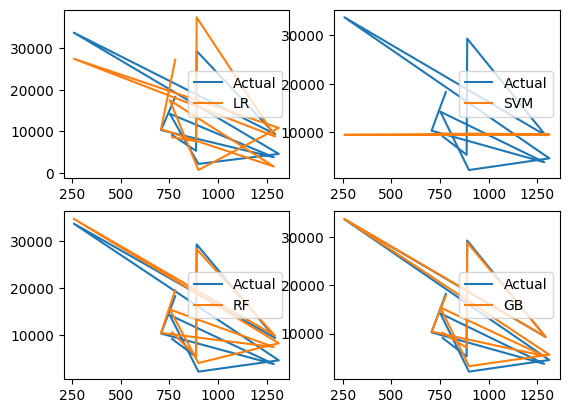

In [ ]:
#visualising models by subplotting
#comparing actual model and list 10 values of predicted values
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['LR'].iloc[0:11],label='LR')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RF'].iloc[0:11],label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GB'].iloc[0:11],label='GB')
plt.legend()

plt.show()

Evaluation

In [ ]:
#Evaluation : by r2(to measure goodness)
#import required libraries
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)


In [ ]:
print(score1,score2,score3,score4)

0.7797027283499592 -0.07221022016555811 0.8424164416409148 0.869132538938268


In [ ]:
#re-test using mean absolute error
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)

In [ ]:
print(s1,s2,s3,s4)

4227.246575990808 8589.407459195485 2782.1510432835375 2557.3346561125295


Predict Charges for new customer

In [ ]:
#predict model for new customer
data= {'age':40,
       'sex':1,
       'bmi':40.30,
       'smoker':1,
       'region': 2,}
df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,smoker,region
0,40,1,40.3,1,2


In [ ]:
#prediction test
new_pred1=gb.predict(df)
print("Medical Insurance (prediction) cost for new customer",new_pred1)

Medical Insurance (prediction) cost for new customer [43156.67828009]


In [ ]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()